In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [2]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)
train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [3]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [4]:
clf.fit(X_train, y_train)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [6]:
y_pred = clf.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.956140350877193

In [9]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[46,  1],
       [ 4, 63]])

In [10]:
clf.decision_function(X_test[12:15])

array([ 5.52822936, -1.17845292,  1.40593323])

In [11]:
clf.predict(X_test[12:15])

array([1, 0, 1])

In [12]:
(clf.decision_function(X_test[12:15]) >0).astype(int)

array([1, 0, 1])

In [16]:
(clf.decision_function(X_test[12:15]) >-2).astype(int)

array([1, 1, 1])

In [17]:
(clf.decision_function(X_test[12:15]) >22).astype(int)

array([0, 0, 0])

In [19]:
for th in range(-3,7):
    print(th,(clf.decision_function(X_test[12:15]) >th).astype(int))

-3 [1 1 1]
-2 [1 1 1]
-1 [1 0 1]
0 [1 0 1]
1 [1 0 1]
2 [1 0 0]
3 [1 0 0]
4 [1 0 0]
5 [1 0 0]
6 [0 0 0]


In [21]:
from sklearn.metrics import roc_curve, auc, average_precision_score

import matplotlib.pyplot as plt
%matplotlib inline

AUC=  0.9942838996506828


(0.0, 1.01)

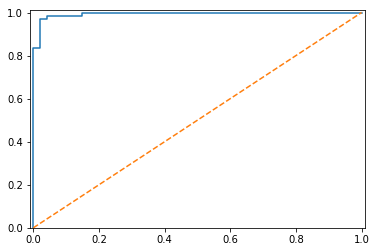

In [24]:
test_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, test_score)

plt.plot(fpr, tpr)
print("AUC= ", auc(fpr, tpr))

plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([0.0, 1.01])